In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_global_water_consumption.CSV.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         500 non-null    object 
 1   Year                                            500 non-null    int64  
 2   Total Water Consumption (Billion Cubic Meters)  500 non-null    float64
 3   Per Capita Water Use (Liters per Day)           500 non-null    float64
 4   Agricultural Water Use (%)                      500 non-null    float64
 5   Industrial Water Use (%)                        500 non-null    float64
 6   Household Water Use (%)                         500 non-null    float64
 7   Rainfall Impact (Annual Precipitation in mm)    500 non-null    float64
 8   Groundwater Depletion Rate (%)                  500 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory us

In [15]:
df.head()

,Country,Year,Total Water Consumption (Billion Cubic Meters),Per Capita Water Use (Liters per Day),Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Rainfall Impact (Annual Precipitation in mm),Groundwater Depletion Rate (%)
0,Argentina,2000,481.490000,235.431429,48.550000,20.844286,30.100000,1288.698571,3.255714
1,Argentina,2001,455.063000,299.551000,48.465000,26.943000,22.550000,1371.729000,3.120000
2,Argentina,2002,482.749231,340.124615,50.375385,29.042308,23.349231,1590.305385,2.733846
3,Argentina,2003,452.660000,326.756667,49.086667,30.476000,24.440000,1816.012667,2.708000
4,Argentina,2004,634.566000,230.346000,38.670000,36.670000,23.924000,815.998000,1.902000


In [11]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [13]:
df['Year'] = df['Year'].dt.year

In [16]:
df.isnull().sum()

Country                                           0
Year                                              0
Total Water Consumption (Billion Cubic Meters)    0
Per Capita Water Use (Liters per Day)             0
Agricultural Water Use (%)                        0
Industrial Water Use (%)                          0
Household Water Use (%)                           0
Rainfall Impact (Annual Precipitation in mm)      0
Groundwater Depletion Rate (%)                    0
dtype: int64

In [17]:
df['Country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France',
       'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico',
       'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Spain',
       'Turkey', 'UK', 'USA'], dtype=object)

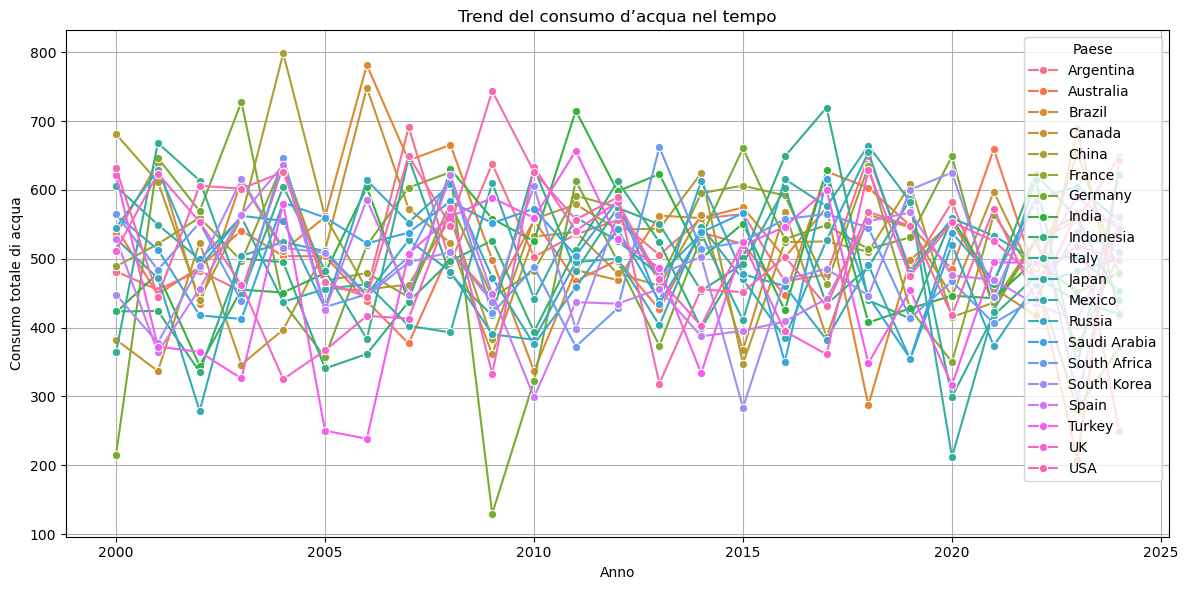

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Total Water Consumption (Billion Cubic Meters)', hue='Country', marker='o')

plt.title('Trend del consumo d’acqua nel tempo')
plt.xlabel('Anno')
plt.ylabel('Consumo totale di acqua')
plt.legend(title='Paese')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
paesi_selezionati = df[df['Total Water Consumption (Billion Cubic Meters)'] > 700]['Country'].unique()
paesi_selezionati

array(['Brazil', 'Canada', 'China', 'Germany', 'India', 'Indonesia',
       'USA'], dtype=object)

In [29]:
paesi_con_picchi = ['Brazil', 'Canada', 'China', 'Germany', 'India', 'Indonesia',
       'USA']

df_filtrato = df[df['Country'].isin(paesi_con_picchi)]

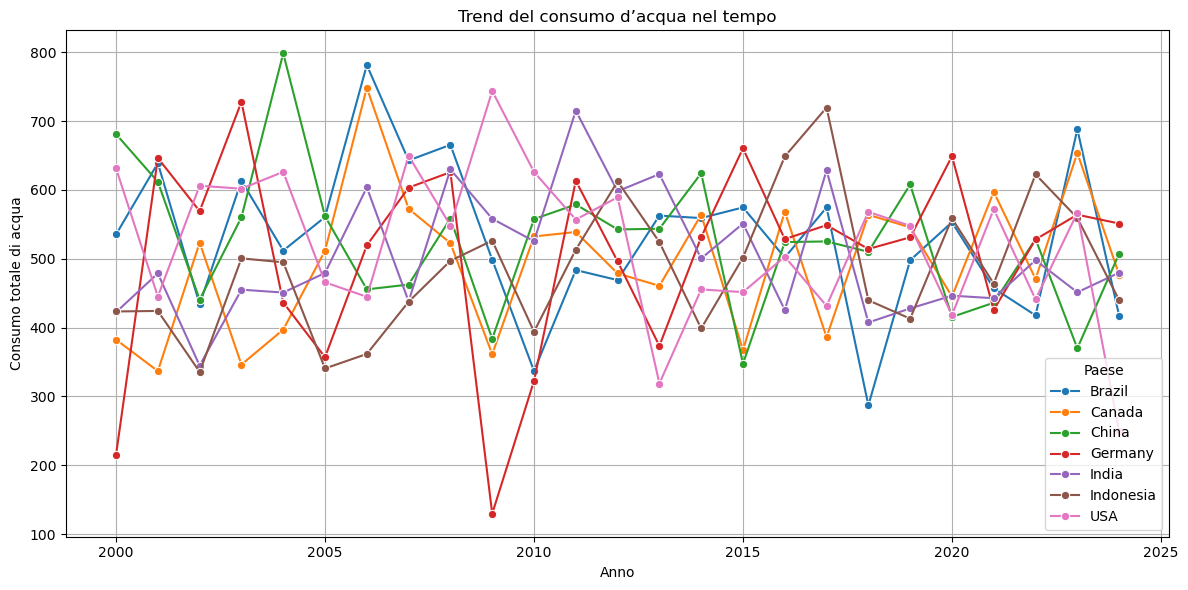

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtrato, x='Year', y='Total Water Consumption (Billion Cubic Meters)', hue='Country', marker='o')

plt.title('Trend del consumo d’acqua nel tempo')
plt.xlabel('Anno')
plt.ylabel('Consumo totale di acqua')
plt.legend(title='Paese')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
df_consumo_acqua = df[['Country','Agricultural Water Use (%)','Industrial Water Use (%)','Household Water Use (%)','Total Water Consumption (Billion Cubic Meters)']]
df_consumo_acqua.head()

,Country,Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Total Water Consumption (Billion Cubic Meters)
0,Argentina,48.550000,20.844286,30.100000,481.490000
1,Argentina,48.465000,26.943000,22.550000,455.063000
2,Argentina,50.375385,29.042308,23.349231,482.749231
3,Argentina,49.086667,30.476000,24.440000,452.660000
4,Argentina,38.670000,36.670000,23.924000,634.566000


In [56]:
statistiche_per_paese = df_consumo_acqua.groupby('Country').agg({
    'Agricultural Water Use (%)': ['mean','median','std'],
    'Industrial Water Use (%)': ['mean','median','std'],
    'Household Water Use (%)': ['mean','median','std'],
    'Total Water Consumption (Billion Cubic Meters)' : ['mean','median','std']
})

styled = statistiche_per_paese.style.highlight_max(axis=0, color='lightgreen')
styled


In [57]:
df_consumo_acqua_per_paese = df_consumo_acqua.groupby('Country').sum()

df_consumo_acqua_per_paese

,Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Total Water Consumption (Billion Cubic Meters)
Country,,,,
Argentina,1285.949215,698.669036,624.863306,13284.860759
Australia,1320.033285,718.110088,628.512604,12505.778389
Brazil,1243.891890,665.307429,621.473196,13263.287436
Canada,1258.200180,736.633787,620.252016,12352.694690
China,1292.634380,696.369836,637.935540,13133.596733
France,1217.414364,653.405460,632.492000,12596.115707
Germany,1184.958272,716.149866,601.077799,12668.588927
India,1244.820751,697.975032,611.273028,12581.662785
Indonesia,1237.606236,671.325665,581.149600,12151.267472


In [58]:
styled2 = df_consumo_acqua_per_paese.style.highlight_max(axis=0, color='lightgreen')
styled2

,Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Total Water Consumption (Billion Cubic Meters)
Country,,,,
Argentina,1285.949215,698.669036,624.863306,13284.860759
Australia,1320.033285,718.110088,628.512604,12505.778389
Brazil,1243.891890,665.307429,621.473196,13263.287436
Canada,1258.200180,736.633787,620.252016,12352.694690
China,1292.634380,696.369836,637.935540,13133.596733
France,1217.414364,653.405460,632.492000,12596.115707
Germany,1184.958272,716.149866,601.077799,12668.588927
India,1244.820751,697.975032,611.273028,12581.662785
Indonesia,1237.606236,671.325665,581.149600,12151.267472


In [59]:
df_tipologia_consumo_acqua = df[['Country','Agricultural Water Use (%)','Industrial Water Use (%)','Household Water Use (%)']]
df_tipologia_consumo_acqua.head()

,Country,Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%)
0,Argentina,48.550000,20.844286,30.100000
1,Argentina,48.465000,26.943000,22.550000
2,Argentina,50.375385,29.042308,23.349231
3,Argentina,49.086667,30.476000,24.440000
4,Argentina,38.670000,36.670000,23.924000


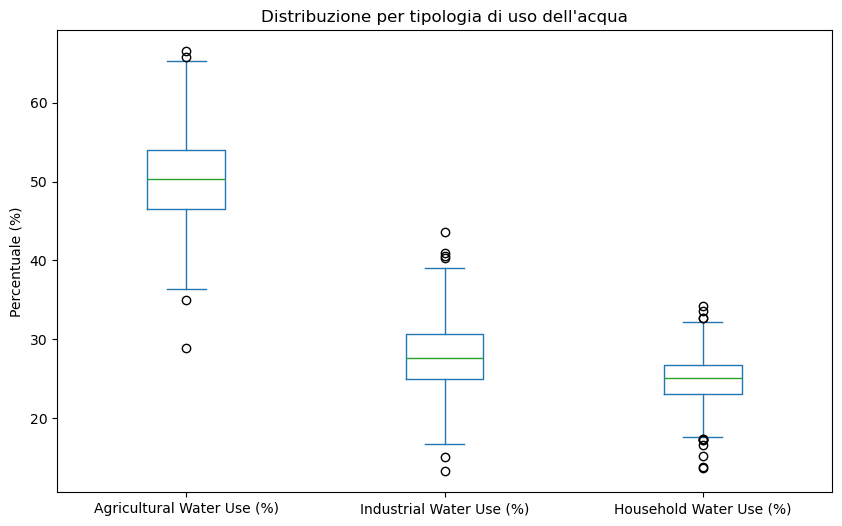

In [60]:
df_tipologia_consumo_acqua.plot(kind='box', figsize=(10, 6))
plt.title('Distribuzione per tipologia di uso dell\'acqua')
plt.ylabel('Percentuale (%)')
plt.show()

In [64]:
df_tipologia_consumo_acqua_clean = round(df[["Agricultural Water Use (%)",'Industrial Water Use (%)','Household Water Use (%)']],2)

df_tipologia_consumo_acqua_clean.head()

,Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%)
0,48.55,20.84,30.10
1,48.46,26.94,22.55
2,50.38,29.04,23.35
3,49.09,30.48,24.44
4,38.67,36.67,23.92


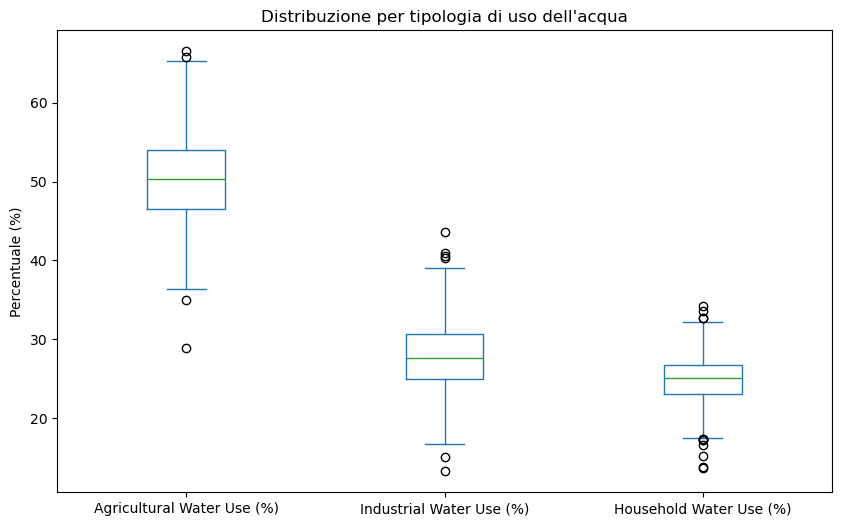

In [65]:
df_tipologia_consumo_acqua_clean.plot(kind='box', figsize=(10, 6))
plt.title('Distribuzione per tipologia di uso dell\'acqua')
plt.ylabel('Percentuale (%)')
plt.show()

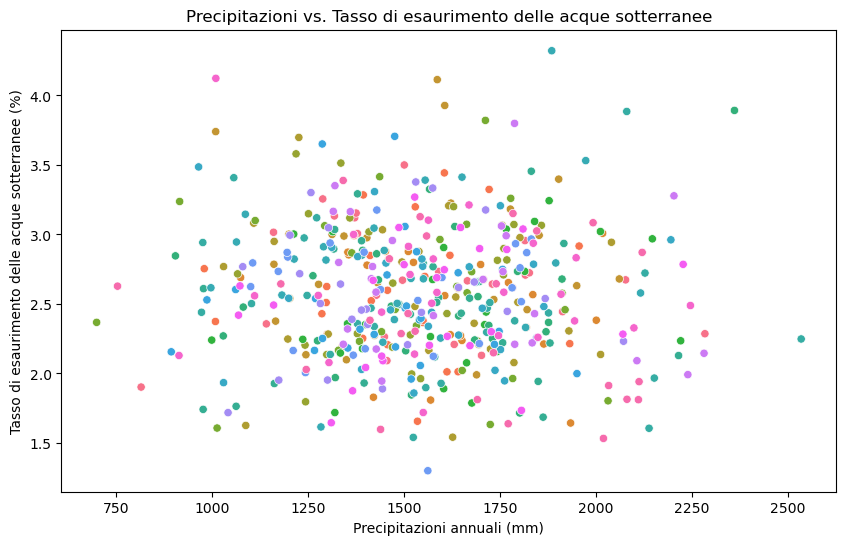

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall Impact (Annual Precipitation in mm)', 
                y='Groundwater Depletion Rate (%)', 
                hue='Country', 
                data=df, legend=False)
plt.title('Precipitazioni vs. Tasso di esaurimento delle acque sotterranee')
plt.xlabel('Precipitazioni annuali (mm)')
plt.ylabel('Tasso di esaurimento delle acque sotterranee (%)')
plt.show()